This file uses predictor.ag to predict the result of the test data by autogluon.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

cycle_dataset = np.load('cycle_dataset.npz')
train_images = cycle_dataset['train_images']
train_labels = cycle_dataset['train_labels']
test_images = cycle_dataset['test_images']
test_labels = cycle_dataset['test_labels']

In [5]:
import os
os.makedirs('train', exist_ok=True)
os.makedirs('test', exist_ok=True)

In [6]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor, ImageDataset

In [7]:
for i in range(60000):
    plt.imsave(f'train/{i}.png', train_images[i])
for i in range(10000):
    plt.imsave(f'test/{i}.png', test_images[i])

In [8]:
import pandas as pd
df = pd.DataFrame({'image': ['train/' + str(i) + '.png' for i in range(len(train_labels))], 'label': train_labels})

In [9]:
predictor = ImagePredictor.load('predictor.ag')

In [10]:
test_dataset = pd.DataFrame({'image': ['test/' + str(i) + '.png' for i in range(len(test_labels))], 'label': test_labels})

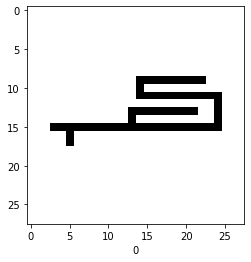

/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


,0,1
0,0.162645,0.837355


In [11]:
plt.imshow(test_images[2757], cmap=plt.cm.binary)
plt.xlabel(test_labels[2757])
plt.show()
predictor.predict_proba(test_dataset.image[2757])

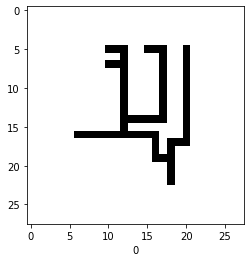

,0,1
0,0.214216,0.785784


In [12]:
plt.imshow(test_images[8557], cmap=plt.cm.binary)
plt.xlabel(test_labels[8557])
plt.show()
predictor.predict_proba(test_dataset.image[8557])